# DATA SCIENCE WITH PYTHON  REPORT COVID-19 

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

# Data Visualization COVID-19

In [1]:
from IPython.display import IFrame
IFrame('https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6', height=700, width=960)

# Data Analaysis COVID-19 Report i Data Science with Python

In [2]:
%config InlineBackend.figure_formats = ['svg']
import math
from numpy import log, exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (11, 4)   # need bigger size otherwise xlabels are cut-off in svg files

import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np
import iminuit

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#

def fetch_data(names = ['confirmed', 'deaths']):
    """Return 3 data frames:
    [confirmed, deaths], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + "_global.csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs


confirmed, deaths = fetch_data()

# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

confirmed : last data point from 2020-06-17 00:00:00
deaths    : last data point from 2020-06-17 00:00:00


2020-06-10 00:00:00  2020-06-11 00:00:00  2020-06-12 00:00:00  \
Country/Region                                                                  
US                           112935               113823               114669   
Brazil                        39680                40919                41828   
United Kingdom                41128                41279                41481   
Italy                         34114                34167                34223   
France                        29260                29287                29315   
Spain                         27136                27136                27136   
Mexico                        15357                15944                16448   
India                          8102                 8498                 8884   
Belgium                        9629                 9636                 9646   
Iran                           8506                 8584                 8659   

                2020-06-13 00:00:00  2020-06-14 00:00:00  2020-06-15 00:00:00  \
Country/Region                                                                  
US                           115436               115732               116127   
Brazil                        42720                43332                43959   
United Kingdom                41662                41698                41736   
Italy                         34301                34345                34371   
France                        29339                29346                29375   
Spain                         27136                27136                27136   
Mexico                        16872                17141                17580   
India                          9195                 9520                 9900   
Belgium                        9650                 9655                 9661   
Iran                           8730                 8837                 8950   

                2020-06-16 00:00:00  2020-06-17 00:00:00  
Country/Region                                            
US                           116963               117717  
Brazil                        45241                46510  
United Kingdom                41969                42153  
Italy                         34405                34448  
France                        29484                29512  
Spain                         27136                27136  
Mexico                        18310                19080  
India                         11903                12237  
Belgium                        9663                 9675  
Iran                           9065                 9185

In [3]:
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[:,-8:]


2020-06-10 00:00:00  2020-06-11 00:00:00  2020-06-12 00:00:00  \
Country/Region                                                                  
US                           112935               113823               114669   
Brazil                        39680                40919                41828   
United Kingdom                41128                41279                41481   
Italy                         34114                34167                34223   
France                        29260                29287                29315   
...                             ...                  ...                  ...   
Uganda                            0                    0                    0   
United Kingdom                    0                    0                    0   
China                             0                    0                    0   
Vietnam                           0                    0                    0   
Lesotho                           0                    0                    0   

                2020-06-13 00:00:00  2020-06-14 00:00:00  2020-06-15 00:00:00  \
Country/Region                                                                  
US                           115436               115732               116127   
Brazil                        42720                43332                43959   
United Kingdom                41662                41698                41736   
Italy                         34301                34345                34371   
France                        29339                29346                29375   
...                             ...                  ...                  ...   
Uganda                            0                    0                    0   
United Kingdom                    0                    0                    0   
China                             0                    0                    0   
Vietnam                           0                    0                    0   
Lesotho                           0                    0                    0   

                2020-06-16 00:00:00  2020-06-17 00:00:00  
Country/Region                                            
US                           116963               117717  
Brazil                        45241                46510  
United Kingdom                41969                42153  
Italy                         34405                34448  
France                        29484                29512  
...                             ...                  ...  
Uganda                            0                    0  
United Kingdom                    0                    0  
China                             0                    0  
Vietnam                           0                    0  
Lesotho                           0                    0  

[266 rows x 8 columns]

In [4]:
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time

def double_time(growth_rate):
    return log(2)/growth_rate


# t1, t2, q1, q2 = 0, 1, 1, 2
# double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    # print(f"double_time_exponential: {q2_div_q1}, {t2_minus_t1} ")
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
        # print(f"shape t: {t2_minus_t1.shape}, shape q: {q2_div_q1.shape}")
        # print(f"type t: {type(t2_minus_t1)}, type q: {type(q2_div_q1.shape)}")

    return t2_minus_t1 * np.log(2) / np.log(q2_div_q1) 


def stack_country(country = "Germany"):

    #create one DataFrame for country/region
    c_df = pd.DataFrame()
    if country == "United Kingdom":
        # UK has many provinces that keep changing. Sum to get all (most relevant is mainland UK)
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
    elif country == "China": 
        # Use only Hubei province
        tmp = confirmed.loc[country]
        c_df['confirmed'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = deaths.loc[country]
        c_df['deaths'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        c_df.drop("Province/State", inplace=True)
    elif country in ['France']:
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
        c_df.drop('Province/State', inplace=True)
    elif country in ['US']:
        c_df['confirmed'] = confirmed.loc[country]
        c_df['deaths'] = deaths.loc[country]
    else:
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
        c_df['deaths'] = deaths.loc[country].drop('Province/State')

    # drop days with confirmed cases = 0
    c1 = c_df[c_df['confirmed'] != 0][1:]
    
    # drop another row
    c_df = c1
  
    c_df.index = string_to_date(c_df.index)
    c_df.country = country  # remember which country we work on, just in case
    
    c_df['days-td'] = c_df.index - c_df.index.min()  # days as TimeDelta type
    c_df['days'] = c_df['days-td'].astype("timedelta64[D]").astype(float)
    
    c_df['new_confirmed'] = c_df['confirmed'].diff()
    c_df['new_deaths'] = c_df['deaths'].diff()
    
    c_df['confirmed_pct'] = c_df['confirmed'].pct_change()+1
    c_df['deaths_pct'] = c_df['deaths'].pct_change()+1
    
    #return c_df
    # growth rate
    c_df['deaths_double_time'] = double_time_exponential(c_df['deaths_pct'].values)
    c_df['confirmed_double_time'] = double_time_exponential(c_df['confirmed_pct'].values)
    c_df['deaths_growth_rate'] = growth_rate(c_df['deaths_double_time'].values)
    c_df['confirmed_growth_rate'] = growth_rate(c_df['confirmed_double_time'].values)

    return c_df

In [5]:
import warnings
warnings.filterwarnings('ignore')
c = stack_country("Germany")
#c.tail(n=5)
c2 = stack_country("United Kingdom")
#c.tail(n=5)
#c2 = stack_country("Spain")
#c.tail(n=5)
c2 = stack_country("Italy")
#c2.tail(n=5)
#c2 = stack_country("France")
#c2.tail(n=5)
c2 = stack_country("China")
#c2.tail(n=5)
#c2 = stack_country("US")

c

confirmed deaths  days-td   days new_confirmed new_deaths  \
2020-01-28         4      0   0 days    0.0           NaN        NaN   
2020-01-29         4      0   1 days    1.0             0          0   
2020-01-30         4      0   2 days    2.0             0          0   
2020-01-31         5      0   3 days    3.0             1          0   
2020-02-01         8      0   4 days    4.0             3          0   
...              ...    ...      ...    ...           ...        ...   
2020-06-13    187267   8793 137 days  137.0            41         10   
2020-06-14    187518   8801 138 days  138.0           251          8   
2020-06-15    187682   8807 139 days  139.0           164          6   
2020-06-16    188252   8820 140 days  140.0           570         13   
2020-06-17    188604   8851 141 days  141.0           352         31   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-28            NaN         NaN                 NaN   
2020-01-29       1.000000         NaN                 NaN   
2020-01-30       1.000000         NaN                 NaN   
2020-01-31       1.250000         NaN                 NaN   
2020-02-01       1.600000         NaN                 NaN   
...                   ...         ...                 ...   
2020-06-13       1.000219    1.001139          609.137677   
2020-06-14       1.001340    1.000910          762.201916   
2020-06-15       1.000875    1.000682         1017.077924   
2020-06-16       1.003037    1.001476          469.927044   
2020-06-17       1.001870    1.003515          197.557924   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-28                    NaN                 NaN                    NaN  
2020-01-29                    inf                 NaN               0.000000  
2020-01-30                    inf                 NaN               0.000000  
2020-01-31               3.106284                 NaN               0.223144  
2020-02-01               1.474770                 NaN               0.470004  
...                           ...                 ...                    ...  
2020-06-13            3165.594708            0.001138               0.000219  
2020-06-14             517.492285            0.000909               0.001339  
2020-06-15             792.892700            0.000682               0.000874  
2020-06-16             228.576660            0.001475               0.003032  
2020-06-17             371.046304            0.003509               0.001868  

[142 rows x 12 columns]

In [6]:
confirmed.loc["US"]

Province/State             NaN
2020-01-22 00:00:00          1
2020-01-23 00:00:00          1
2020-01-24 00:00:00          2
2020-01-25 00:00:00          2
                        ...   
2020-06-13 00:00:00    2074526
2020-06-14 00:00:00    2094058
2020-06-15 00:00:00    2114026
2020-06-16 00:00:00    2137731
2020-06-17 00:00:00    2163290
Name: US, Length: 149, dtype: object

In [7]:
def overview_plot(c_df, rollingwindow=7):
    """expect """
    fig, axes = plt.subplots(4, 1, figsize=(8, 14))
    ax = axes[0]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'], '-b', label='confirmed')
    ax.plot(c_df.index, c_df['deaths'], '-r', label='deaths')
    ax.legend(loc='center left')
    country = c_df.country
    ax.set_title(country + " accumulated data")
    ax.set_yscale('log')

    ax = axes[1]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'].diff(), 'ob', label='day-to-day change confirmed')
    ax.plot(c_df.index, c_df['deaths'].diff(), 'xr', label='day-to-day change deaths')
    ax.legend(loc='center left')
    #ax.set_yscale('log')
    

    ax = axes[2]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_double_time'], 'xr', label='double time deaths')
    ax.plot(c_df.index, c_df['deaths_double_time'].rolling(rollingwindow, center=True).mean(),
            '-r', label='double time deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_double_time'], 'ob', label='double time confirmed')
    ax.plot(c_df.index, c_df['confirmed_double_time'].rolling(rollingwindow, center=True).mean(), 
            '-b', label='double time confirmed rolling')
    ax.legend(loc='center left')
    ax.set_ylabel('days to double numbers \n bigger is better')
    maxy = min(20, max(c_df['confirmed_double_time']))
    ax.set_ylim(0, maxy)

    ax = axes[3]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_growth_rate'], 'xr', label='growth rate deaths')
    ax.plot(c_df.index, c_df['deaths_growth_rate'].rolling(rollingwindow, center=True).mean(), 'r-', label='growth rate deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'], 'ob', label='confirmed growth rate')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'].rolling(rollingwindow, center=True).mean(), 
            'b-', label='confirmed growth rate rolling')
    ax.legend(loc='center left')
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('growth rate r in\n f(t) = exp(r*t)\n(smaller is better)')
    
    # fig.savefig(f"figures/{country}-overview.svg")
    return axes

In [8]:
import warnings
warnings.filterwarnings('ignore')
china = stack_country('China')
germany = stack_country('Germany')
uk = stack_country("United Kingdom")
us = stack_country("US")
italy = stack_country("Italy")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe461358310>,
      dtype=object)

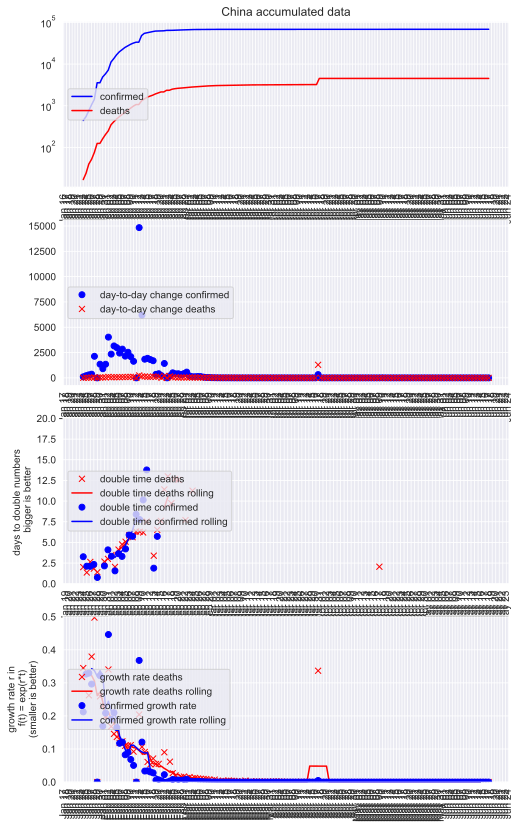

In [9]:
overview_plot(china)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4668eab50>,
      dtype=object)

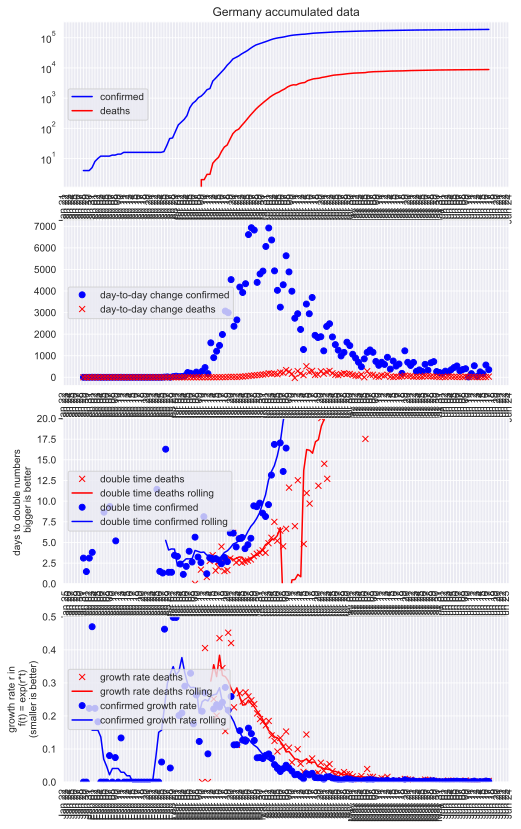

In [10]:
overview_plot(germany)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4609cc810>,
      dtype=object)

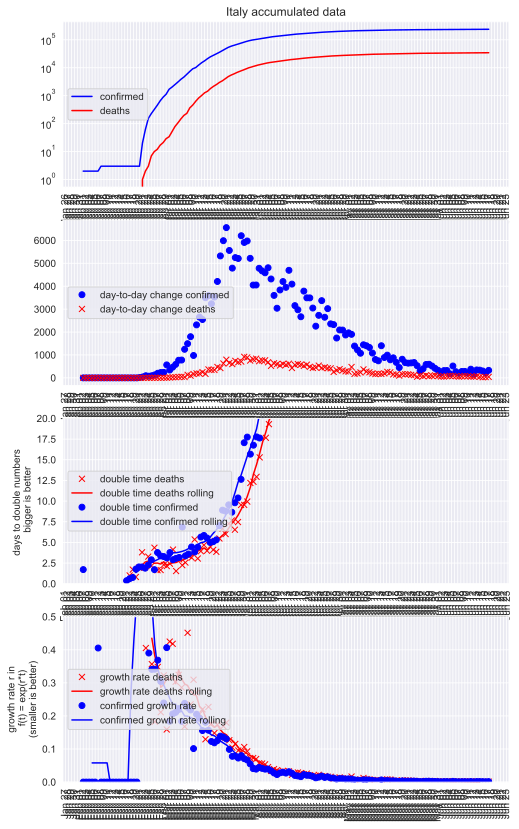

In [11]:
overview_plot(italy)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe46905bb10>,
      dtype=object)

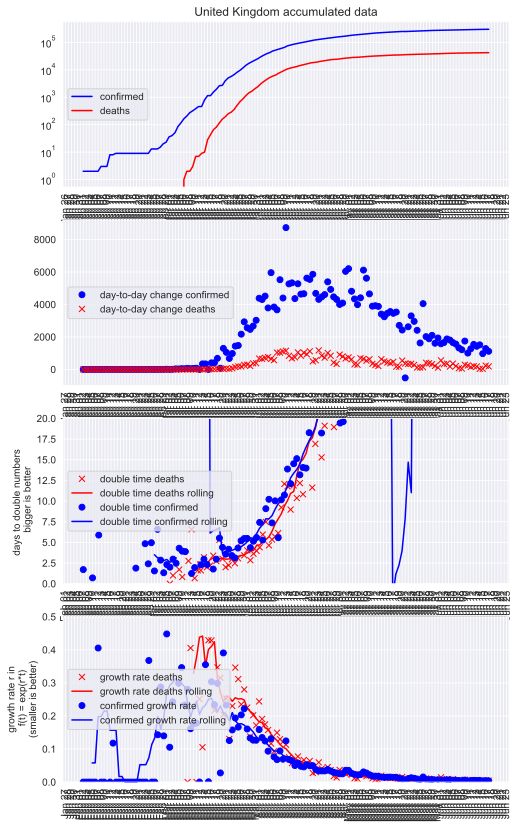

In [12]:
overview_plot(uk)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe46906a9d0>,
      dtype=object)

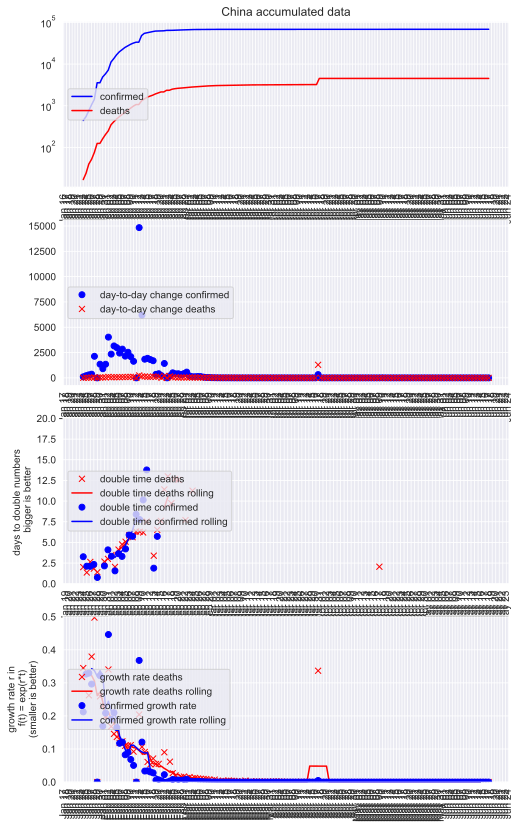

In [13]:
c = stack_country('China')
overview_plot(c)

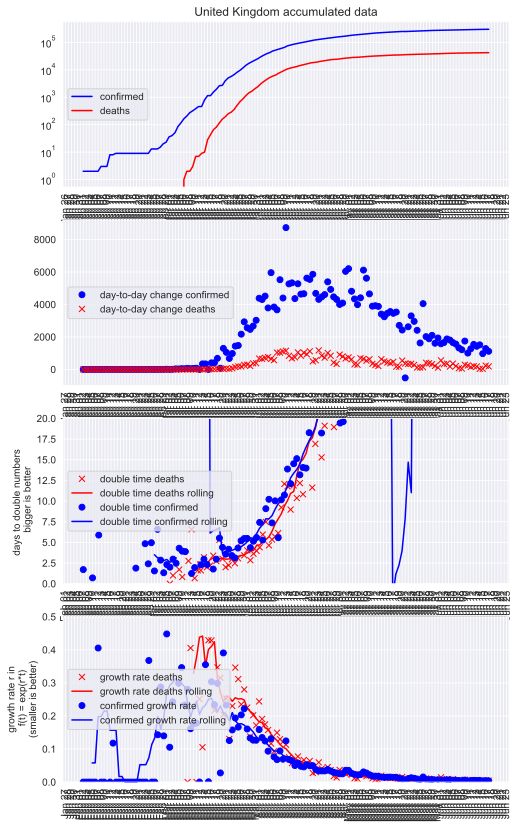

In [14]:
uk = stack_country('United Kingdom')
overview_plot(uk);

In [15]:
# compute doubling time (and growth rate) for a longer sequence of days (by fitting)


reduced chi^2: 0.0712340133141523
r   : 0.0506
t0  : -33.7
a0  : -3.15



------------------------------------------------------------------
| FCN = 0.07123                 |     Ncalls=228 (228 total)     |
| EDM = 9.18E-05 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | r    |   0.05    |   0.06    |            |            |         |         |       |
| 1 | t0   |    -30    |     80    |            |            |         |         |       |
| 2 | a0   |   -3.1    |    14.2   |            |            |         |         |       |
------------------------------------------------------------------------------------------

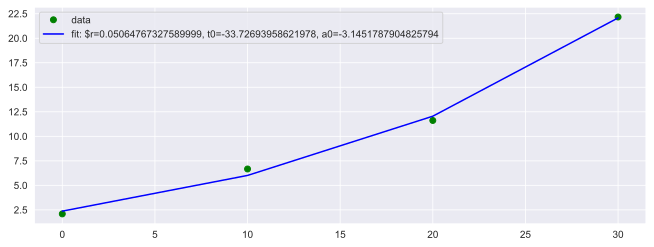

In [16]:
def pretty_params(**par):
    end='\n'
    s = ""
    for p in par:
        s += f"{p:3} : {par[p]:.3g}" + end
    return s


def model(xdata, r, t0, a0):
    return np.exp(r*(xdata-t0))+a0



def exp_fit(xdata, ydata, p0):
    r, t0, a0 = p0
    
    def least_squares(r, t0, a0):
        yvar = 10
        return sum((ydata - model(xdata, r, t0, a0))**2)/yvar
    
    m = iminuit.Minuit(least_squares, 
                       r=r, t0=t0, a0=a0, error_r=0.02, error_t0=0.2, error_a0=1, 
                       errordef=1)
    res = m.migrad()
    print(f"reduced chi^2: {m.fval / (len(ydata) - 3)}")
    r, t0, a0 = m.np_values()
    print(pretty_params(r=r, t0=t0, a0=a0))
    
    return m, res

def plot(xdata, ydata, r, t0, a0, annotate=""):
    #r, t0, a0 = m.np_values()

    fitted = model(xdata, r, t0, a0)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xdata, ydata, 'og')
    ax.plot(xdata, fitted, '-b')
    ax.legend(["data", f"fit: $r={r}, t0={t0}, a0={a0}"])
    #ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
    ax.set_title(annotate)
    #ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', rotation=90)
    #fig.savefig('figures/infections-with-model-fit.svg')
    # print(fitted_infections)
    return ax

def test_model(): 
    xdata = np.linspace(0, 30, 4)
    ydata = 0 + np.exp(0.1*(xdata - 0)) + 5*np.random.random_sample(xdata.shape)    
    m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
    r, t0, a0 = m.np_values()
    plot(xdata, ydata, r, t0, a0)
    return res, m, xdata, ydata


res, m, xdata, ydata = test_model()
res


reduced chi^2: 5.178620761505135e-09
r   : -4.99e-05
t0  : 118
a0  : 6.81e+04

Double time: -13890.2 days


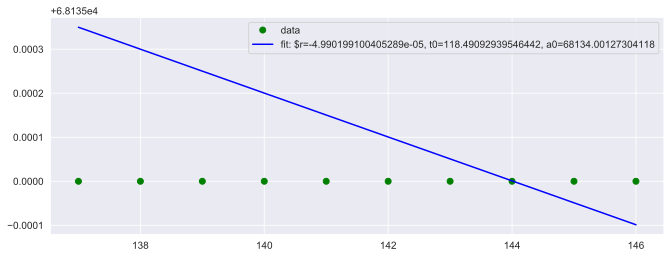

In [17]:
# Exponential fit through last n days
series = c['confirmed']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
plot(xdata, ydata, r, t0, a0)
print(f"Double time: {double_time(r):.1f} days")


reduced chi^2: 3.671609359467622e-06
r   : 0.00165
t0  : 121
a0  : 4.51e+03

Double time: 419.0 days


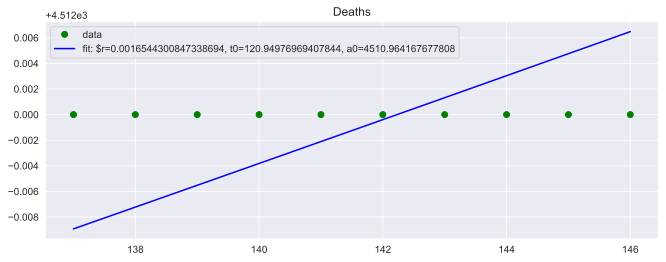

In [18]:
# Exponential fit through last n days, deaths
series = c['deaths']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
ax = plot(xdata, ydata, r, t0, a0)
ax.set_title("Deaths")
print(f"Double time: {double_time(r):.1f} days")


In [19]:
def grow_rate_n_days(series, n=7):
    """Use the last 4 data points to estimate growth rate (and doubling time) for each day"""
    par = pd.DataFrame(index=series.index, columns=['r', 't0', 'a0', 'chi2'])
    print(f"Data stack shape = {series.shape}")
    for i in range(n, len(series)):
        start = i-n
        end = i
        print(f"Working on {start} to {end}, this is {start}/{len(series-n)}")
        xdata_0 = (series.index[start:end] - series.index[0])
        xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
        ydata = series.values[start:end]
        # Attempt fit
        m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
        r, t0, a0 = m.np_values()
        par.iloc[i].at['r'] = r
        par.iloc[i].at['t0'] = t0
        par.iloc[i].at['a0'] = a0
        print(f"r={r:10}, t0={t0:10}, a0={a0:10}")
        plot(xdata, ydata, r, t0, a0)
            
    return par

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 121.04675136500313
r   : 0.0735
t0  : -108
a0  : 1.8e+05

r=0.07349495033869709, t0=-107.52687389701303, a0=180247.0581258981
Working on 1 to 8, this is 1/20
reduced chi^2: 78.3988844341165
r   : 0.169
t0  : -39.6
a0  : 1.82e+05

r=0.16921390471036798, t0=-39.61232886921617, a0=182244.6376383365
Working on 2 to 9, this is 2/20
reduced chi^2: 45.418865839977244
r   : 0.202
t0  : -31.5
a0  : 1.83e+05

r=0.2016123520634095, t0=-31.54316793957433, a0=182548.683924321
Working on 3 to 10, this is 3/20
reduced chi^2: 571.1752573003657
r   : 0.102
t0  : -74
a0  : 1.81e+05

r=0.10230162909378113, t0=-74.02328014794195, a0=180930.74109050914
Working on 4 to 11, this is 4/20
reduced chi^2: 757.9713959016168
r   : 0.0268
t0  : -351
a0  : 1.7e+05

r=0.02677515590548078, t0=-351.02457978506726, a0=170375.06186098818
Working on 5 to 12, this is 5/20
reduced chi^2: 587.5260841895877
r   : 0.0136
t0  : -751
a0  : 1.56e+05

r=0.0135

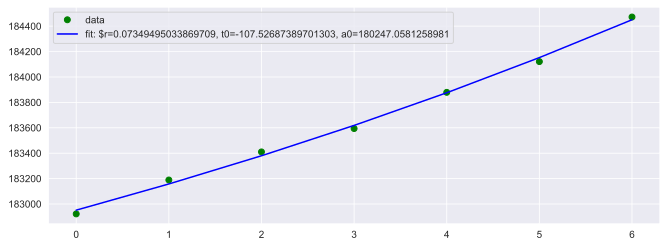

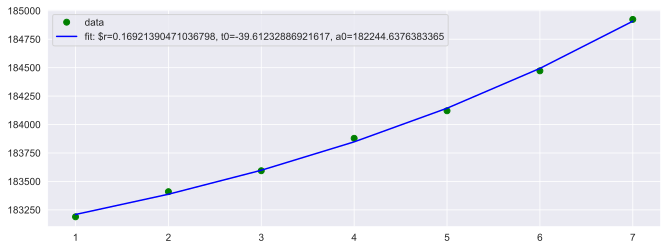

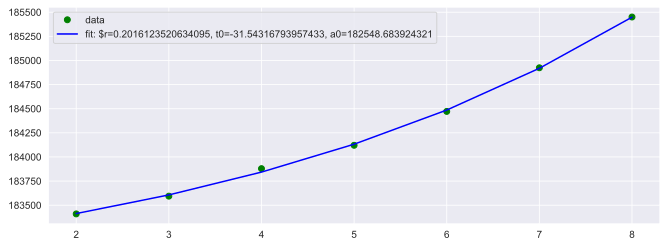

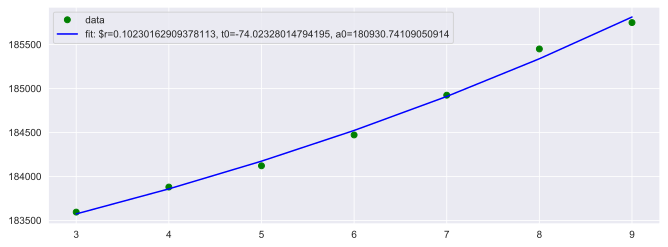

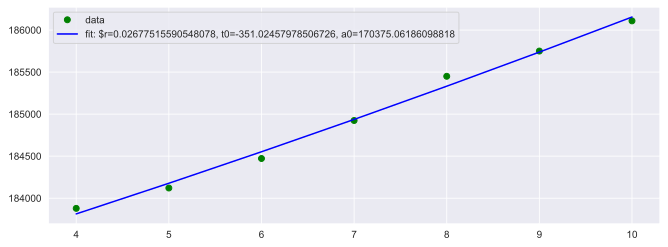

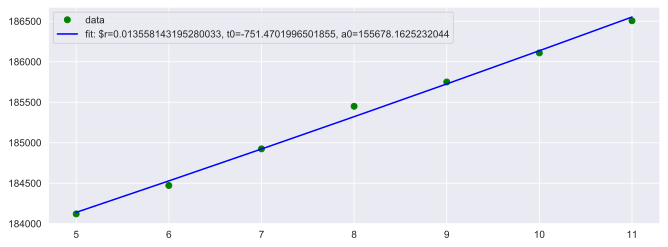

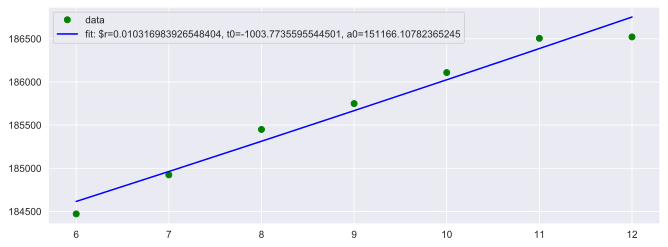

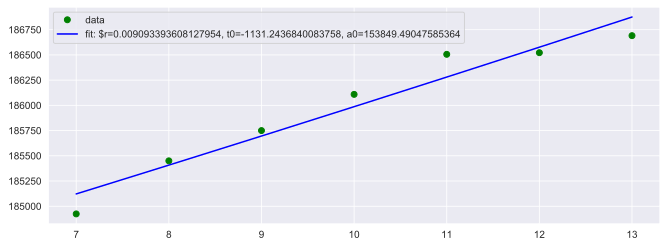

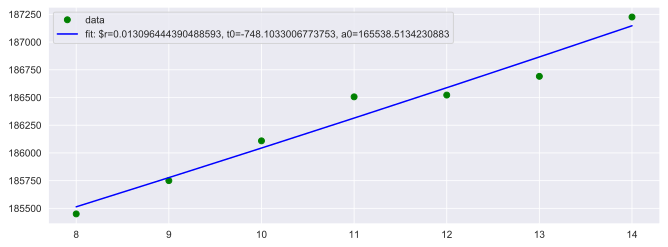

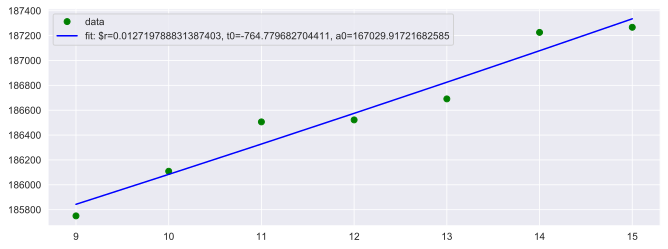

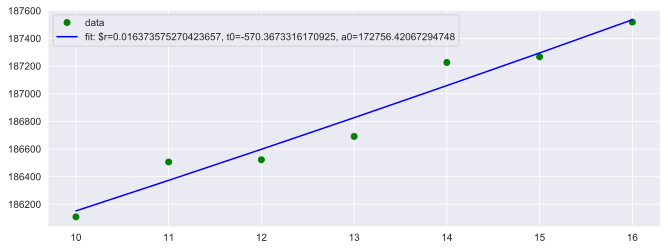

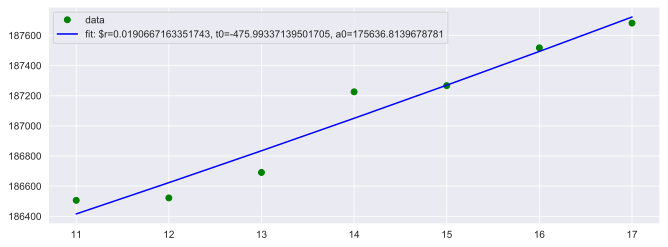

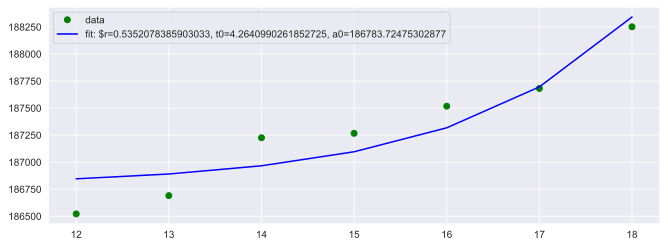

In [20]:
    
c = stack_country('Germany')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])
#

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 636.3624550701591
r   : 0.00943
t0  : -1.09e+03
a0  : 2.02e+05

r=0.00943358467571344, t0=-1092.8377361549387, a0=202329.93698679254
Working on 1 to 8, this is 1/20
reduced chi^2: 538.2507665716655
r   : 0.0707
t0  : -114
a0  : 2.29e+05

r=0.07066691122997583, t0=-113.90884350707309, a0=229338.74023376437
Working on 2 to 9, this is 2/20
reduced chi^2: 486.0741088010046
r   : 0.0817
t0  : -95.7
a0  : 2.3e+05

r=0.08167905965786788, t0=-95.66186429038662, a0=230069.7626473868
Working on 3 to 10, this is 3/20
reduced chi^2: 749.5101735979168
r   : 0.0152
t0  : -646
a0  : 2.14e+05

r=0.015207852194103606, t0=-646.3657777764278, a0=213762.50983385014
Working on 4 to 11, this is 4/20
reduced chi^2: 885.760192699008
r   : 0.0131
t0  : -756
a0  : 2.12e+05

r=0.013145460036113154, t0=-756.353022704106, a0=211613.72375094483
Working on 5 to 12, this is 5/20
reduced chi^2: 941.1746109395395
r   : 0.0126
t0  : -787
a0  : 2.12e

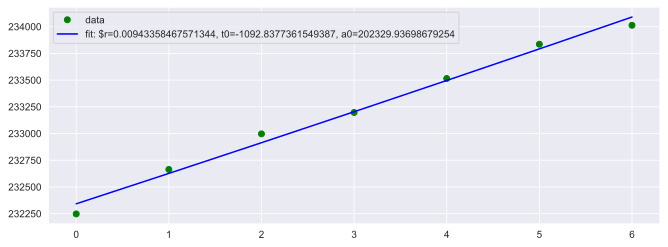

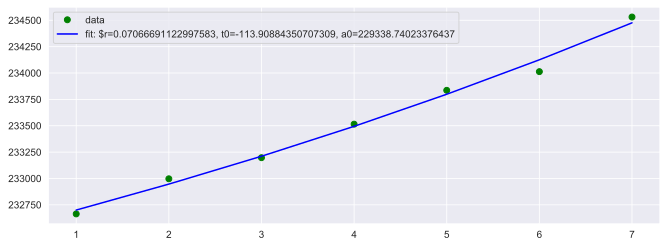

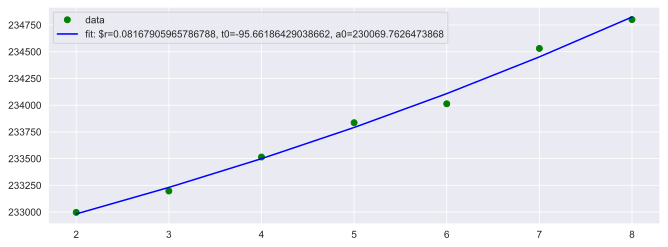

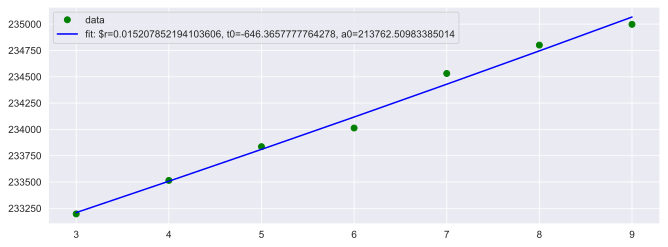

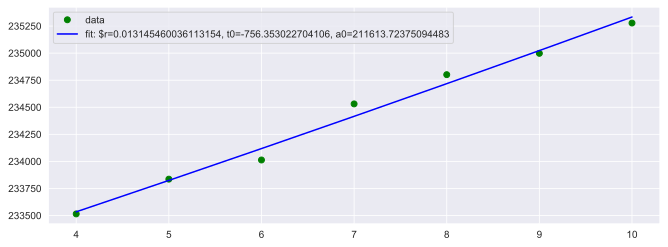

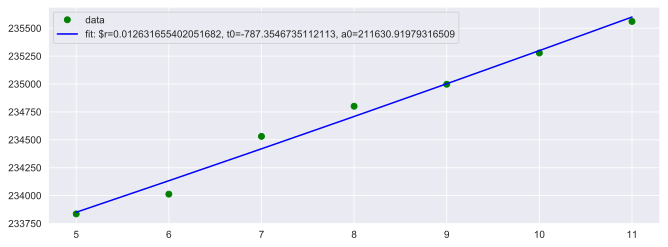

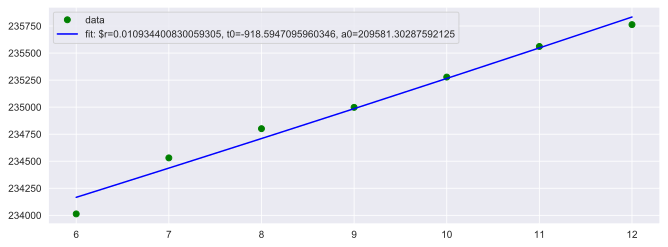

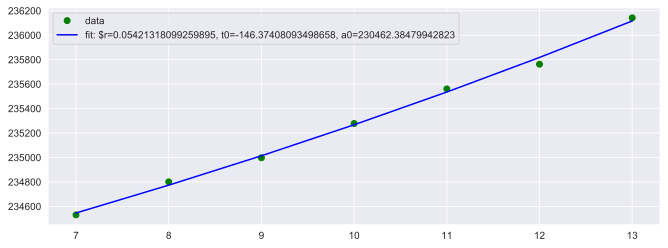

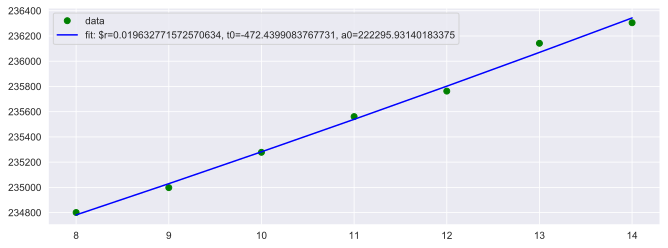

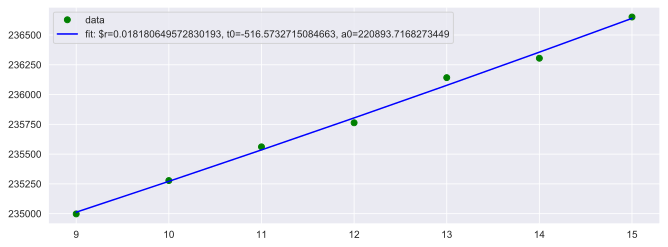

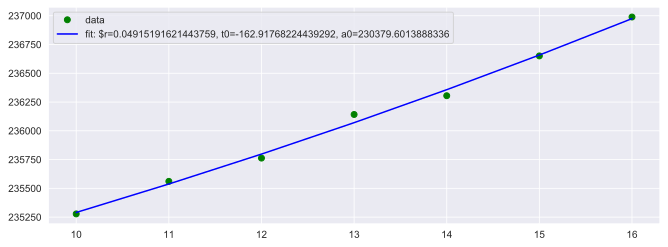

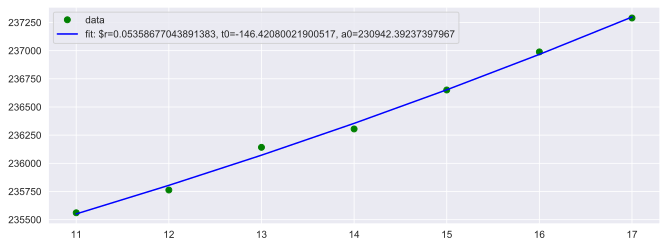

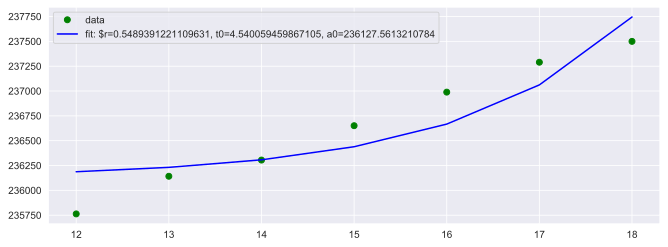

In [21]:
c = stack_country('Italy')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 498459.6534521555
r   : 0.0194
t0  : -711
a0  : 7.76e+05

r=0.019414883640503585, t0=-710.6311095699422, a0=776341.0616344444
Working on 1 to 8, this is 1/20
reduced chi^2: 132616.15178094542
r   : 0.0517
t0  : -245
a0  : 1.44e+06

r=0.05171368783880573, t0=-245.20708113708307, a0=1441376.0779741802
Working on 2 to 9, this is 2/20
reduced chi^2: 94375.0219555218
r   : 0.0571
t0  : -219
a0  : 1.49e+06

r=0.05714528550505886, t0=-219.4769952149288, a0=1485012.1444046153
Working on 3 to 10, this is 3/20
reduced chi^2: 508306.37274810823
r   : 0.0212
t0  : -648
a0  : 8.53e+05

r=0.021150945515378588, t0=-648.426339951179, a0=853115.8064094184
Working on 4 to 11, this is 4/20
reduced chi^2: 1335375.6403525653
r   : 0.0169
t0  : -825
a0  : 6.43e+05

r=0.01688842856274918, t0=-824.6058055799184, a0=643281.0732855044
Working on 5 to 12, this is 5/20
reduced chi^2: 2050034.4760909602
r   : 0.0149
t0  : -943
a0  : 5.41e+05



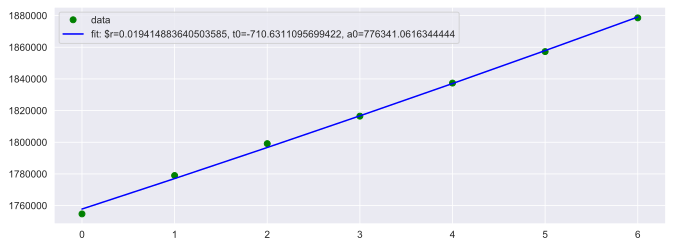

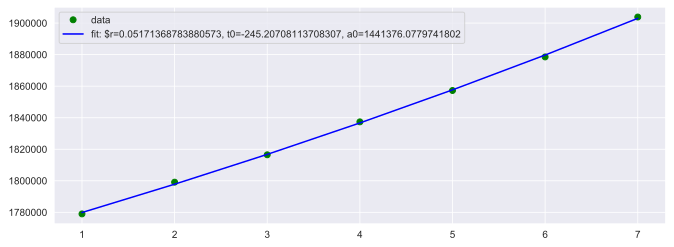

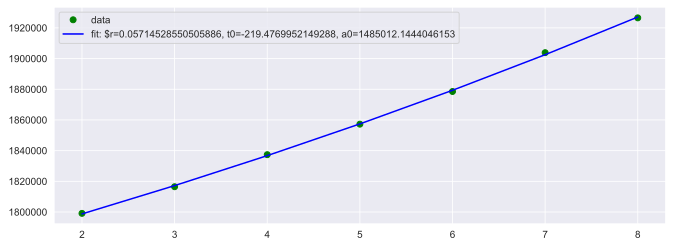

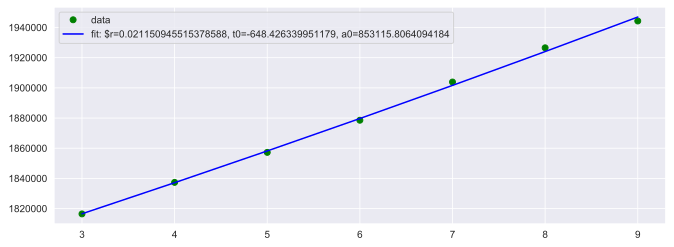

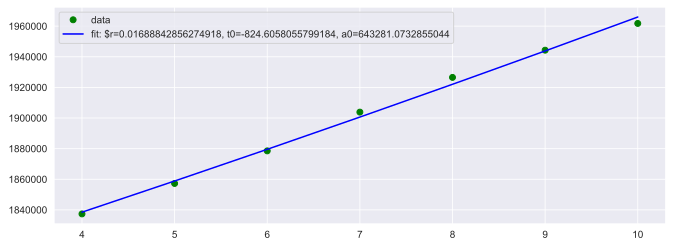

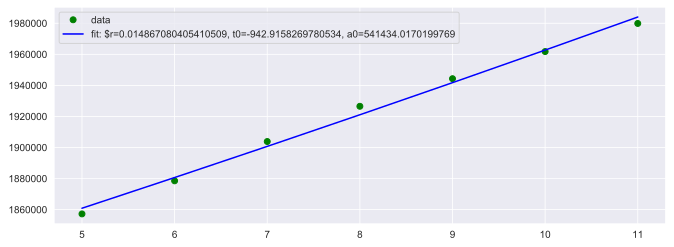

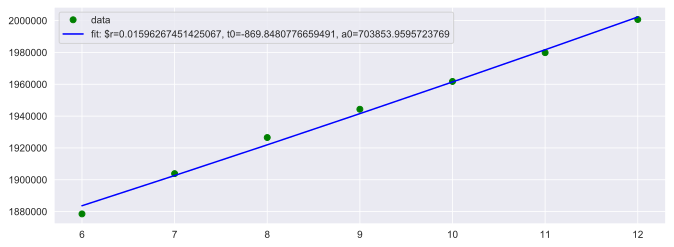

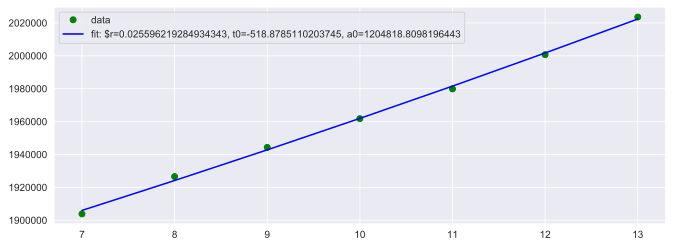

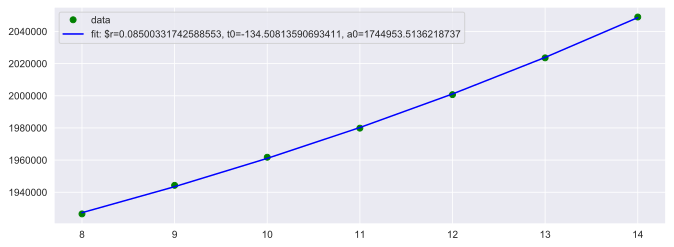

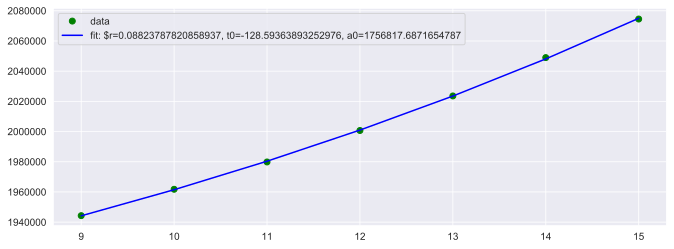

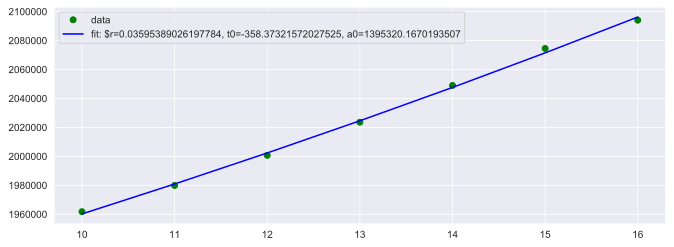

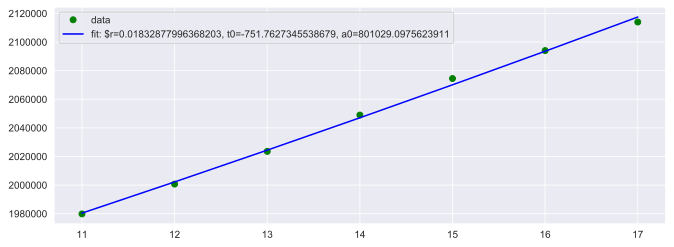

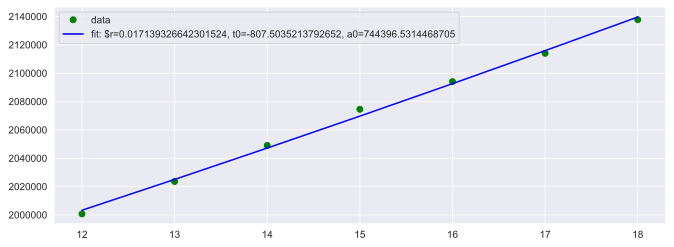

In [22]:
c = stack_country('US')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 2081.6590427842743
r   : 0.0138
t0  : -727
a0  : 2.17e+05

r=0.013767067393805382, t0=-727.0225400542281, a0=216518.37693024284
Working on 1 to 8, this is 1/20
reduced chi^2: 252.99758935906638
r   : 0.109
t0  : -68.8
a0  : 2.37e+05

r=0.10852667429674709, t0=-68.78450347707299, a0=237275.76482095013
Working on 2 to 9, this is 2/20
reduced chi^2: 319.648540685114
r   : 0.0605
t0  : -136
a0  : 2.35e+05

r=0.06052559841548394, t0=-136.46468397027684, a0=235063.09255167266
Working on 3 to 10, this is 3/20
reduced chi^2: 267.2577204787816
r   : 0.0107
t0  : -958
a0  : 2.1e+05

r=0.010714419052402733, t0=-957.5391202614019, a0=210172.8211701532
Working on 4 to 11, this is 4/20
reduced chi^2: 939.3253627854808
r   : 0.011
t0  : -922
a0  : 2.14e+05

r=0.011005074223960975, t0=-921.5645853083851, a0=213500.7400488625
Working on 5 to 12, this is 5/20
reduced chi^2: 746.5886292281352
r   : 0.0109
t0  : -924
a0  : 2.16e+05

r

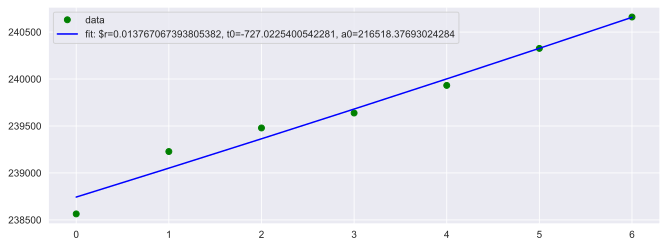

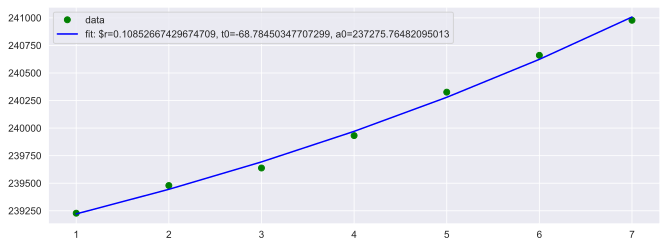

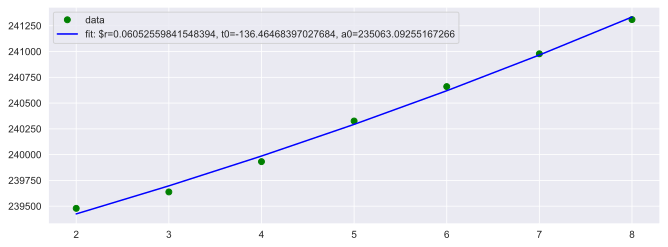

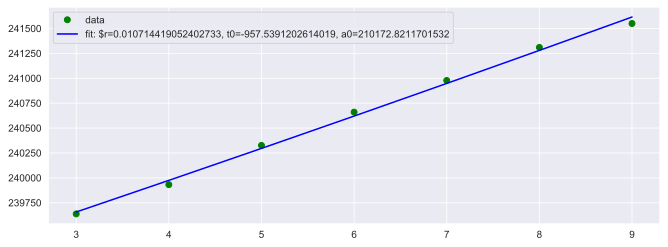

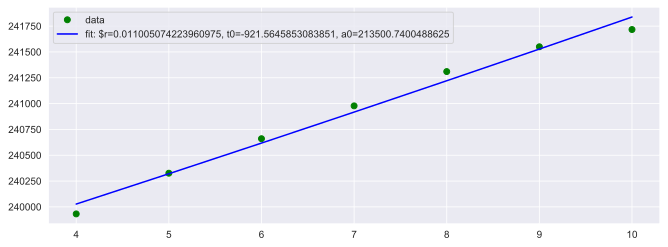

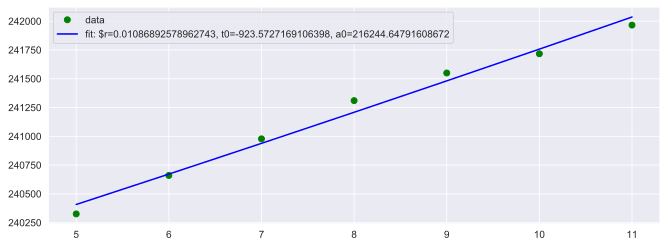

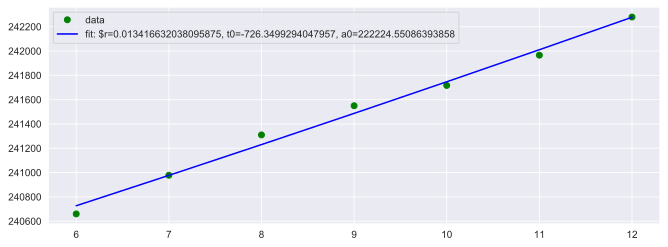

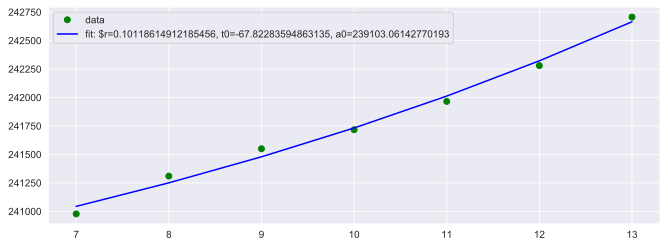

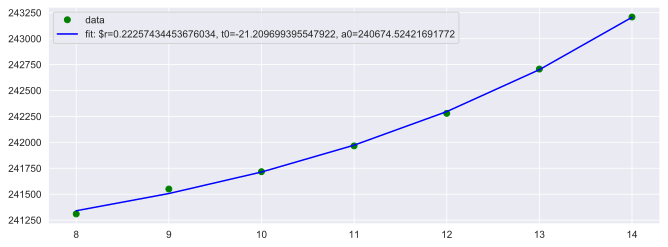

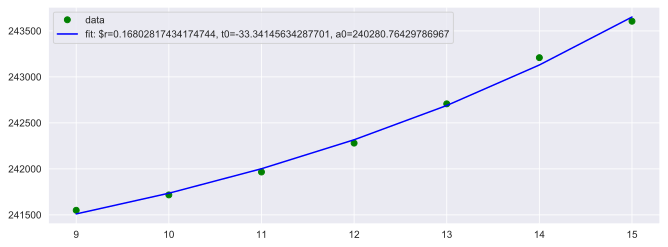

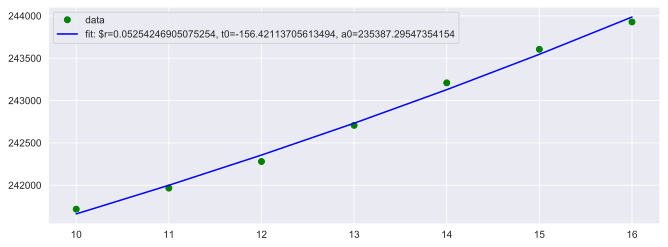

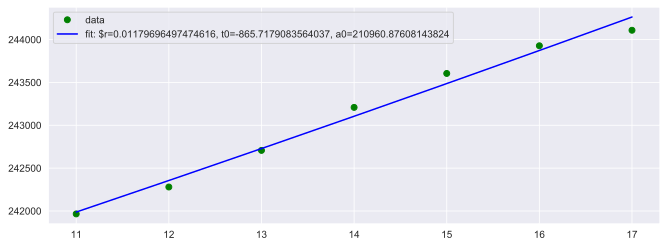

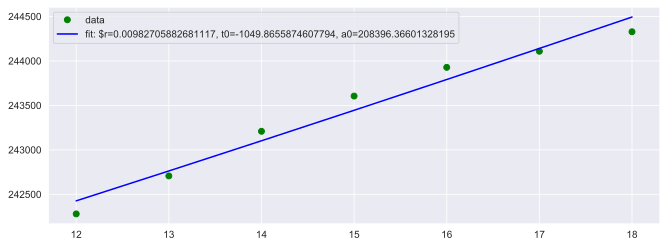

In [23]:
c = stack_country('Spain')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 3.4059728325255227e-06
r   : 0.00203
t0  : 6.1
a0  : 6.81e+04

r=0.0020266299265371316, t0=6.10381922535042, a0=68134.00806210183
Working on 1 to 8, this is 1/20
reduced chi^2: 1.3609273204622377e-06
r   : 0.00139
t0  : 7.05
a0  : 6.81e+04

r=0.0013869570847126807, t0=7.046425782285234, a0=68134.00382933035
Working on 2 to 9, this is 2/20
reduced chi^2: 9.996616323778284e-08
r   : -0.000299
t0  : 8.1
a0  : 6.81e+04

r=-0.0002992665635226134, t0=8.098178817290114, a0=68133.99953300036
Working on 3 to 10, this is 3/20
reduced chi^2: 3.316020333633626e-06
r   : 0.00218
t0  : 7.36
a0  : 6.81e+04

r=0.002181714337759406, t0=7.355900541440908, a0=68134.00308996942
Working on 4 to 11, this is 4/20
reduced chi^2: 1.86054504581326e-07
r   : 0.000258
t0  : 10.3
a0  : 6.81e+04

r=0.00025762138991114003, t0=10.293681600237269, a0=68133.9999546415
Working on 5 to 12, this is 5/20
reduced chi^2: 1.87360120145044e-06
r   : -0.000

RuntimeError: exception was raised in user function
User function arguments:
     r = -203.190136
    t0 = +12.809718
    a0 = +68153.778821
Original python exception in user function:
OverflowError: (34, 'Result too large')
  File "<ipython-input-16-6349838f1c32>", line 19, in least_squares
    return sum((ydata - model(xdata, r, t0, a0))**2)/yvar


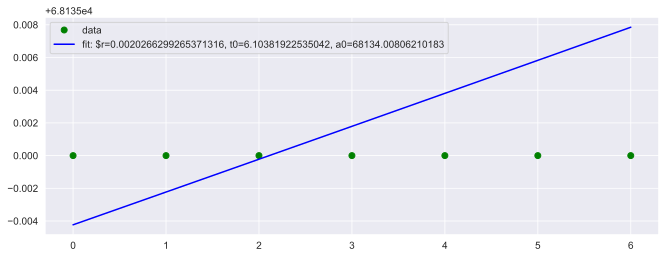

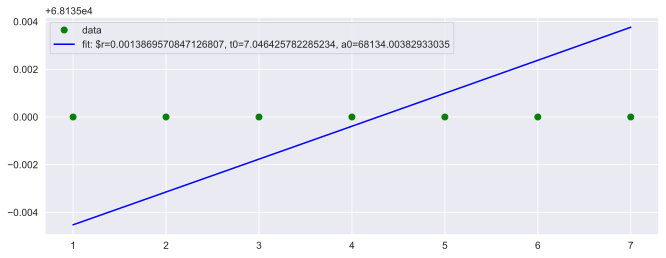

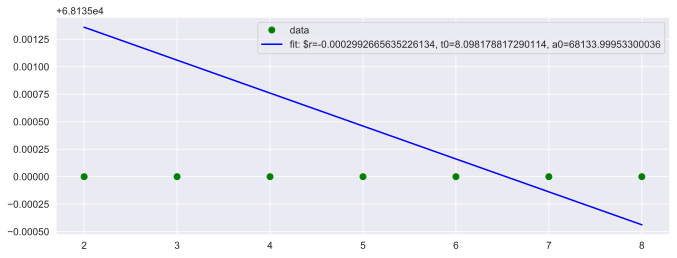

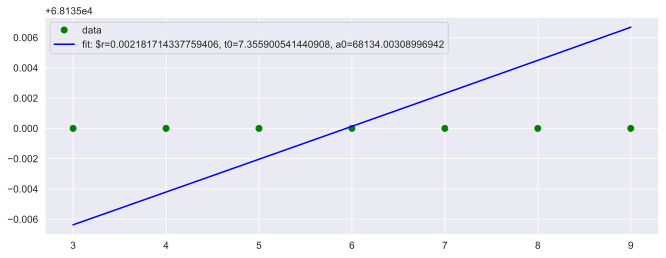

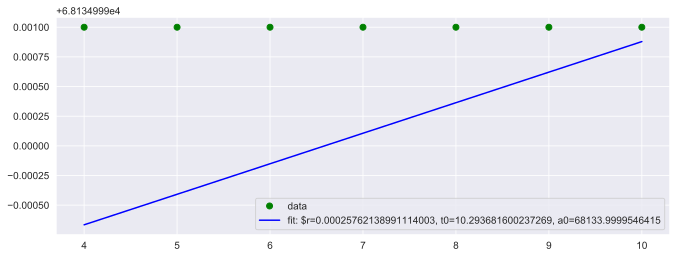

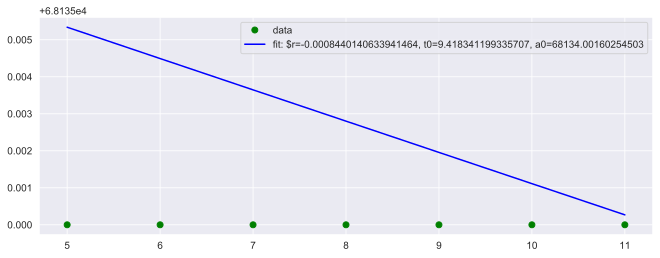

In [24]:
c = stack_country('China')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

In [25]:
p_confirmed.tail(n=10)

r       t0      a0 chi2
2020-06-08   0.0107144 -957.539  210173  NaN
2020-06-09   0.0110051 -921.565  213501  NaN
2020-06-10   0.0108689 -923.573  216245  NaN
2020-06-11   0.0134166  -726.35  222225  NaN
2020-06-12    0.101186 -67.8228  239103  NaN
2020-06-13    0.222574 -21.2097  240675  NaN
2020-06-14    0.168028 -33.3415  240281  NaN
2020-06-15   0.0525425 -156.421  235387  NaN
2020-06-16    0.011797 -865.718  210961  NaN
2020-06-17  0.00982706 -1049.87  208396  NaN

In [26]:
p_confirmed['double_time'] = double_time(p_confirmed['r'])

In [27]:
p_confirmed.tail(n=10)

r       t0      a0 chi2 double_time
2020-06-08   0.0107144 -957.539  210173  NaN     64.6929
2020-06-09   0.0110051 -921.565  213501  NaN     62.9843
2020-06-10   0.0108689 -923.573  216245  NaN     63.7733
2020-06-11   0.0134166  -726.35  222225  NaN     51.6633
2020-06-12    0.101186 -67.8228  239103  NaN     6.85022
2020-06-13    0.222574 -21.2097  240675  NaN     3.11423
2020-06-14    0.168028 -33.3415  240281  NaN     4.12518
2020-06-15   0.0525425 -156.421  235387  NaN     13.1921
2020-06-16    0.011797 -865.718  210961  NaN     58.7564
2020-06-17  0.00982706 -1049.87  208396  NaN     70.5346

Log basics ...

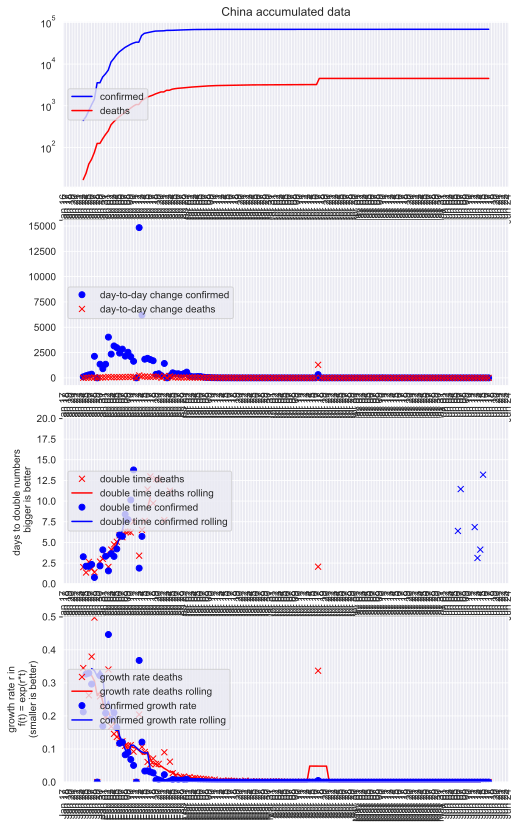

In [28]:
ax0, ax1, ax2, ax3 = overview_plot(c)
ax2.plot(p_confirmed.index, p_confirmed['double_time'], 'xb', label='double time confirmed fit')


In [29]:
from math import log 
log(2)/log(0.5)

-1.0

From https://en.wikipedia.org/wiki/Doubling_time
    
$$\Delta t = (t_2 - t_1) * \left(\frac{\log(2)}{\log
    \left(\frac{f(t_2)}{f(t_1)}\right)}\right)$$

In [30]:
from math import log
def double_time_exponential2(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate2(double_time):
    return log(2)/double_time


t1, t2, q1, q2 = 0, 1, 1, 2
double_time_exponential2(t1, t2, q1, q2), growth_rate2(double_time_exponential2(t1, t2, q1, q2) )

(1.0, 0.6931471805599453)

In [31]:
2**(1/double_time_exponential2(0, 1, 1, 21))

21.000000000000007

In [32]:
2/math.exp(1)

0.7357588823428847

In [33]:
math.exp(0.5)/2

0.8243606353500641

In [34]:
math.exp(0.6931471805599453*4)

15.999999999999998

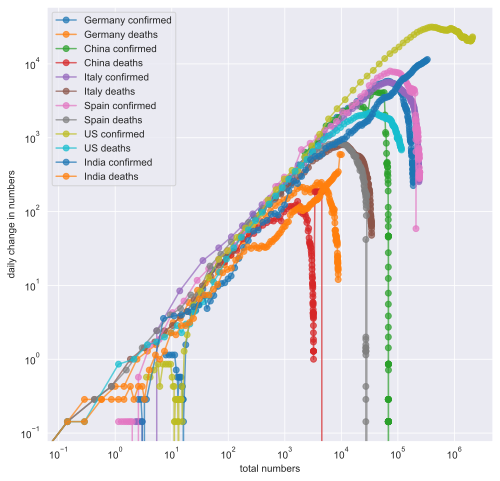

In [35]:
def logplots(c, columns, ax=None, alpha=0.7):
    """Dataframe c with colunmname 'column' contains the data we are interested in.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax = ax
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        pass
    
    for col in columns:
        assert col in c.columns
        c2 = c.copy()
        c2['change'] = c2[col].diff()
    
        ax.plot(c2[col], c2['change'], '-o', label=c.country + " " + col, alpha=alpha) 
    
    ax.legend()
    ax.set_xlabel("total numbers")
    ax.set_ylabel("daily change in numbers")
    return ax

    
    
c = stack_country("Germany")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'])

c = stack_country("China")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Italy")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Spain")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("US")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("India")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()

c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)


In [36]:
c

confirmed deaths  days-td   days new_confirmed new_deaths  \
2020-01-31         1      0   0 days    0.0           NaN        NaN   
2020-02-01         1      0   1 days    1.0             0          0   
2020-02-02         2      0   2 days    2.0             1          0   
2020-02-03         3      0   3 days    3.0             1          0   
2020-02-04         3      0   4 days    4.0             0          0   
...              ...    ...      ...    ...           ...        ...   
2020-06-13    320922   9195 134 days  134.0         11929        311   
2020-06-14    332424   9520 135 days  135.0         11502        325   
2020-06-15    343091   9900 136 days  136.0         10667        380   
2020-06-16    354065  11903 137 days  137.0         10974       2003   
2020-06-17    366946  12237 138 days  138.0         12881        334   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-31            NaN         NaN                 NaN   
2020-02-01       1.000000         NaN                 NaN   
2020-02-02       2.000000         NaN                 NaN   
2020-02-03       1.500000         NaN                 NaN   
2020-02-04       1.000000         NaN                 NaN   
...                   ...         ...                 ...   
2020-06-13       1.038606    1.035007           20.144971   
2020-06-14       1.035840    1.035345           19.955301   
2020-06-15       1.032089    1.039916           17.709474   
2020-06-16       1.031986    1.202323            3.761876   
2020-06-17       1.036380    1.028060           25.047163   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-31                    NaN                 NaN                    NaN  
2020-02-01                    inf                 NaN               0.000000  
2020-02-02               1.000000                 NaN               0.693147  
2020-02-03               1.709511                 NaN               0.405465  
2020-02-04                    inf                 NaN               0.000000  
...                           ...                 ...                    ...  
2020-06-13              18.298751            0.034408               0.037879  
2020-06-14              19.684322            0.034735               0.035213  
2020-06-15              21.945833            0.039140               0.031584  
2020-06-16              22.015300            0.184256               0.031485  
2020-06-17              19.397313            0.027674               0.035734  

[139 rows x 12 columns]

In [37]:
confirmed.loc['Germany']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-13 00:00:00    187267
2020-06-14 00:00:00    187518
2020-06-15 00:00:00    187682
2020-06-16 00:00:00    188252
2020-06-17 00:00:00    188604
Name: Germany, Length: 149, dtype: object

In [38]:
deaths.loc['Germany']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-06-13 00:00:00    8793
2020-06-14 00:00:00    8801
2020-06-15 00:00:00    8807
2020-06-16 00:00:00    8820
2020-06-17 00:00:00    8851
Name: Germany, Length: 149, dtype: object

In [39]:
confirmed.loc['US']

Province/State             NaN
2020-01-22 00:00:00          1
2020-01-23 00:00:00          1
2020-01-24 00:00:00          2
2020-01-25 00:00:00          2
                        ...   
2020-06-13 00:00:00    2074526
2020-06-14 00:00:00    2094058
2020-06-15 00:00:00    2114026
2020-06-16 00:00:00    2137731
2020-06-17 00:00:00    2163290
Name: US, Length: 149, dtype: object

In [40]:
deaths.loc['US']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-13 00:00:00    115436
2020-06-14 00:00:00    115732
2020-06-15 00:00:00    116127
2020-06-16 00:00:00    116963
2020-06-17 00:00:00    117717
Name: US, Length: 149, dtype: object

In [41]:
confirmed.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    1                    9   
China                  Beijing                   14                   22   
China                Chongqing                    6                    9   
China                   Fujian                    1                    5   
China                    Gansu                    0                    2   
China                Guangdong                   26                   32   
China                  Guangxi                    2                    5   
China                  Guizhou                    1                    3   
China                   Hainan                    4                    5   
China                    Hebei                    1                    1   
China             Heilongjiang                    0                    2   
China                    Henan                    5                    5   
China                Hong Kong                    0                    2   
China                    Hubei                  444                  444   
China                    Hunan                    4                    9   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    1                    5   
China                  Jiangxi                    2                    7   
China                    Jilin                    0                    1   
China                 Liaoning                    2                    3   
China                    Macau                    1                    2   
China                  Ningxia                    1                    1   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    3   
China                 Shandong                    2                    6   
China                 Shanghai                    9                   16   
China                   Shanxi                    1                    1   
China                  Sichuan                    5                    8   
China                  Tianjin                    4                    4   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    2   
China                   Yunnan                    1                    2   
China                 Zhejiang                   10                   27   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                            15                   39                   60   
China                            36                   41                   68   
China                            27                   57                   75   
China                            10                   18                   35   
China                             2                    4                    7   
China                            53                   78                  111   
China                            23                   23                   36   
China                             3                    4                    5   
China                             8                   19                   22   
China                             2                    8                   13   
China                             4                    9                   15   
China                             9                   32                   83   
China                             2                    5                    8   
China                           549                  761                 1058   
China                            24                   43   

In [42]:
deaths.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    0                    0   
China                  Beijing                    0                    0   
China                Chongqing                    0                    0   
China                   Fujian                    0                    0   
China                    Gansu                    0                    0   
China                Guangdong                    0                    0   
China                  Guangxi                    0                    0   
China                  Guizhou                    0                    0   
China                   Hainan                    0                    0   
China                    Hebei                    0                    1   
China             Heilongjiang                    0                    0   
China                    Henan                    0                    0   
China                Hong Kong                    0                    0   
China                    Hubei                   17                   17   
China                    Hunan                    0                    0   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    0                    0   
China                  Jiangxi                    0                    0   
China                    Jilin                    0                    0   
China                 Liaoning                    0                    0   
China                    Macau                    0                    0   
China                  Ningxia                    0                    0   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    0   
China                 Shandong                    0                    0   
China                 Shanghai                    0                    0   
China                   Shanxi                    0                    0   
China                  Sichuan                    0                    0   
China                  Tianjin                    0                    0   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    0   
China                   Yunnan                    0                    0   
China                 Zhejiang                    0                    0   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             1                    1                    1   
China                             1                    1                    1   
China                             0                    0                    1   
China                             0                    0                    0   
China                            24                   40                   52   
China                             0                    0   

In [43]:
confirmed.loc['Italy']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-13 00:00:00    236651
2020-06-14 00:00:00    236989
2020-06-15 00:00:00    237290
2020-06-16 00:00:00    237500
2020-06-17 00:00:00    237828
Name: Italy, Length: 149, dtype: object

In [44]:
deaths.loc['Italy']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-06-13 00:00:00    34301
2020-06-14 00:00:00    34345
2020-06-15 00:00:00    34371
2020-06-16 00:00:00    34405
2020-06-17 00:00:00    34448
Name: Italy, Length: 149, dtype: object

In [45]:
confirmed.loc['Spain']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-13 00:00:00    243605
2020-06-14 00:00:00    243928
2020-06-15 00:00:00    244109
2020-06-16 00:00:00    244328
2020-06-17 00:00:00    244683
Name: Spain, Length: 149, dtype: object

In [46]:
deaths.loc['Spain']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-06-13 00:00:00    27136
2020-06-14 00:00:00    27136
2020-06-15 00:00:00    27136
2020-06-16 00:00:00    27136
2020-06-17 00:00:00    27136
Name: Spain, Length: 149, dtype: object

In [47]:
confirmed.loc['India']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-13 00:00:00    320922
2020-06-14 00:00:00    332424
2020-06-15 00:00:00    343091
2020-06-16 00:00:00    354065
2020-06-17 00:00:00    366946
Name: India, Length: 149, dtype: object

In [48]:
deaths.loc['India']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-06-13 00:00:00     9195
2020-06-14 00:00:00     9520
2020-06-15 00:00:00     9900
2020-06-16 00:00:00    11903
2020-06-17 00:00:00    12237
Name: India, Length: 149, dtype: object